In [1]:
#import tensorflow as tf
#import tflearn as tl
import tqdm as tq
import numpy as np
import os
import cv2
from random import shuffle 

In [2]:
TRAIN_DIR = "D:\\Deep_Learning\\Cat_vs_Dog\\train\\train"
TEST_DIR =  "D:\\Deep_Learning\\Cat_vs_Dog\\test1\\test1"
img_size= 50
LR= 0.001


In [3]:
Model_name ='dogvscats-{}-{}.model'.format(LR,'2Conv-basic')

In [4]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label =='cat': return[1,0]
    elif word_label =='dog': return[0,1]

In [5]:
def create_train():
    training_data= []
    for img in os.listdir(TRAIN_DIR):
        label =  label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE), (img_size,img_size))
        training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [19]:
def process_test_data():
    testing_data = []
    for img in os.listdir(TEST_DIR):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size,img_size))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [7]:
train_data = create_train()

In [8]:
train_data = np.load('train_data.npy')

In [9]:
print(train_data)

[[ array([[190, 189, 189, ..., 100,  95,  91],
       [197, 193, 197, ...,  98,  91,  90],
       [187, 196, 193, ..., 104,  98,  96],
       ..., 
       [ 51,  67, 109, ..., 111,  90, 103],
       [108, 105, 114, ..., 152, 111, 110],
       [103, 106, 109, ..., 129, 132, 137]], dtype=uint8)
  array([1, 0])]
 [ array([[161, 177, 167, ..., 183, 173, 185],
       [183, 170, 177, ..., 191, 185, 168],
       [174, 165, 168, ..., 170, 176, 183],
       ..., 
       [ 46,  46,  50, ..., 160, 179, 162],
       [ 41,  47,  46, ..., 171, 172, 164],
       [ 41,  42,  49, ..., 178, 164, 158]], dtype=uint8)
  array([0, 1])]
 [ array([[ 78,  67, 125, ..., 163, 157, 156],
       [ 77,  73, 127, ..., 167, 161, 159],
       [ 83,  90, 112, ..., 168, 165, 162],
       ..., 
       [ 57,  58,  61, ...,  64,  60,  67],
       [ 52,  53,  56, ...,  69,  63,  60],
       [ 51,  53,  53, ...,  68,  62,  64]], dtype=uint8)
  array([1, 0])]
 ..., 
 [ array([[153, 159, 150, ..., 205, 215, 225],
       [249, 

In [10]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

convnet = input_data(shape=[None, img_size, img_size, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

In [11]:
# if os.path.exists('{}.meta'.format(Model_name)):
#     model.load(Model_name)
#     print('model loaded!')

In [12]:
train = train_data[:-500]
test = train_data[-500:]

In [13]:
X = np.array([i[0] for i in train]).reshape(-1,img_size,img_size,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,img_size,img_size,1)
test_y = [i[1] for i in test]


In [14]:
model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=Model_name)

Training Step: 1148  | total loss: 0.48669 | time: 47.441s
| Adam | epoch: 003 | loss: 0.48669 - acc: 0.7681 -- iter: 24448/24500
Training Step: 1149  | total loss: 0.48367 | time: 48.566s
| Adam | epoch: 003 | loss: 0.48367 - acc: 0.7694 | val_loss: 0.50450 - val_acc: 0.7460 -- iter: 24500/24500
--


In [15]:
# run this on command prompt #tensorboard --logdir=D:\\Deep_Learning\\Cat_vs_Dog 

In [16]:
model.save(Model_name)

INFO:tensorflow:D:\Deep_Learning\Cat_vs_Dog\Code\dogvscats-0.001-2Conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


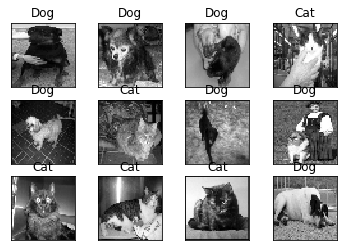

In [20]:
import matplotlib.pyplot as plt

# if you need to create the data:
test_data = process_test_data()
# if you already have some saved:
test_data = np.load('test_data.npy')

fig=plt.figure()

for num,data in enumerate(test_data[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(img_size,img_size,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [25]:
with open('submission_file.csv','w') as f:
    f.write('id,label\n')
            
with open('submission_file.csv','a') as f:
    for data in test_data:
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(img_size,img_size,1)
        model_out = model.predict([data])[0]
        f.write('{},{}\n'.format(img_num,model_out[1]))